# Business Understanding

Studi Kasus:

OmahTi mempunyai perusahaan yang bernama “TiProduction”. Direktur TiProduction sedang melakukan riset untuk memprediksi apa saja faktor yang mempengaruhi dari bertambah atau kurangnya suatu kalori dari manusia. Hasil riset tersebut akan digunakan untuk membuat produk dengan inovasi terbaru agar masyarakat mampu mengatur kadar kalori yang dimilikinya setelah berolahraga. Sebagai seorang data scientist, apa yang akan anda lakukan agar direktur tersebut dapat membuat keputusan tentang produk tersebut?

## Library

In [113]:
#Library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [114]:
# Memanggil Dataset dengan mengimpor CSV dataset
calories_df = pd.read_csv('/kaggle/input/olc-calories/Train.csv')

In [115]:
# Info dataset
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     9000 non-null   int64  
 1   Gender      9000 non-null   object 
 2   Age         9000 non-null   int64  
 3   Height      9000 non-null   float64
 4   Weight      9000 non-null   float64
 5   Duration    9000 non-null   float64
 6   Heart_Rate  9000 non-null   float64
 7   Body_Temp   9000 non-null   float64
 8   Calories    9000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 632.9+ KB


In [116]:
#cek variabel (kolom)
calories_df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

kesimpulan:
Pada dataset ini terdapat 9 kolom yaitu
1. User_ID
2. Gender
3. Age
4. Height
5. Weight
6. Duration
7. Heart Rate
8. Body Temp
9. Calories

In [117]:
#cek 10 baris pertama
calories_df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,16255880,female,46,187.0,82.0,24.0,98.0,40.7,127.0
1,13075573,male,21,181.0,85.0,4.0,77.0,39.0,5.0
2,15653313,male,53,194.0,97.0,19.0,105.0,40.3,139.0
3,10286803,male,61,199.0,114.0,2.0,83.0,38.2,9.0
4,19983656,female,31,170.0,67.0,29.0,111.0,41.1,192.0
5,14901222,male,75,168.0,73.0,16.0,95.0,40.1,102.0
6,13014192,male,26,189.0,86.0,5.0,90.0,39.2,18.0
7,16897657,male,25,180.0,79.0,4.0,92.0,38.8,14.0
8,13585267,male,22,179.0,81.0,21.0,96.0,40.3,86.0
9,17196989,female,78,170.0,67.0,9.0,94.0,40.0,51.0


Menjelaskan Dataset seperti kolom apa saja yang ada di dataset.

Contoh: Dataset ini terdapat .... Kolom yaitu
1. age (usia)
2. gender (jenis kelamin)
3. disesuaikan sendiri, dll.

# Data Preparation

In [118]:
# Describe dataset
calories_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,16255880,female,46,187.0,82.0,24.0,98.0,40.7,127.0
1,13075573,male,21,181.0,85.0,4.0,77.0,39.0,5.0
2,15653313,male,53,194.0,97.0,19.0,105.0,40.3,139.0
3,10286803,male,61,199.0,114.0,2.0,83.0,38.2,9.0
4,19983656,female,31,170.0,67.0,29.0,111.0,41.1,192.0
...,...,...,...,...,...,...,...,...,...
8995,11890347,female,75,148.0,51.0,22.0,104.0,40.6,151.0
8996,13504073,female,21,172.0,67.0,20.0,104.0,40.7,114.0
8997,17918506,male,57,189.0,92.0,8.0,90.0,39.5,41.0
8998,12133833,male,35,174.0,76.0,12.0,97.0,40.2,57.0


##Check Missing Value, Data Duplicate, Outlier

In [119]:
#Check Missing Value
calories_df.isnull().any()

User_ID       False
Gender        False
Age           False
Height        False
Weight        False
Duration      False
Heart_Rate    False
Body_Temp     False
Calories      False
dtype: bool

In [120]:
calories_df.isnull().any()

User_ID       False
Gender        False
Age           False
Height        False
Weight        False
Duration      False
Heart_Rate    False
Body_Temp     False
Calories      False
dtype: bool

kesimpulan: tidak ada missing value

In [121]:
#check duplicate
calories_df.duplicated().any()

False

kesimpulan: tidak ada duplicated data

## Data Cleaning
Kita tidak akan menggunakan kolom "User ID" dalam perhitungan, maka akan kita drop

In [122]:
#Menghilangkan kolom User ID (drop unused columns)
calories_df.drop(columns=["User_ID"], inplace = True)

In [123]:
calories_df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,female,46,187.0,82.0,24.0,98.0,40.7,127.0
1,male,21,181.0,85.0,4.0,77.0,39.0,5.0
2,male,53,194.0,97.0,19.0,105.0,40.3,139.0
3,male,61,199.0,114.0,2.0,83.0,38.2,9.0
4,female,31,170.0,67.0,29.0,111.0,41.1,192.0
...,...,...,...,...,...,...,...,...
8995,female,75,148.0,51.0,22.0,104.0,40.6,151.0
8996,female,21,172.0,67.0,20.0,104.0,40.7,114.0
8997,male,57,189.0,92.0,8.0,90.0,39.5,41.0
8998,male,35,174.0,76.0,12.0,97.0,40.2,57.0


In [124]:
# Normalisasi Data (Opsional, dibutuhkan atau tidak?)

## EDA (Exploratory Data Analysis)

In [125]:
# EDA (Exploratory Data Analysis)
calories_df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,42.649778,174.402444,74.923667,15.394222,95.389111,40.012111,88.494222
std,16.939759,14.235968,15.049965,8.318243,9.569471,0.784531,62.292445
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,39.000000,174.000000,74.000000,15.000000,95.000000,40.200000,77.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,137.000000
max,79.000000,218.000000,132.000000,30.000000,128.000000,41.500000,300.000000


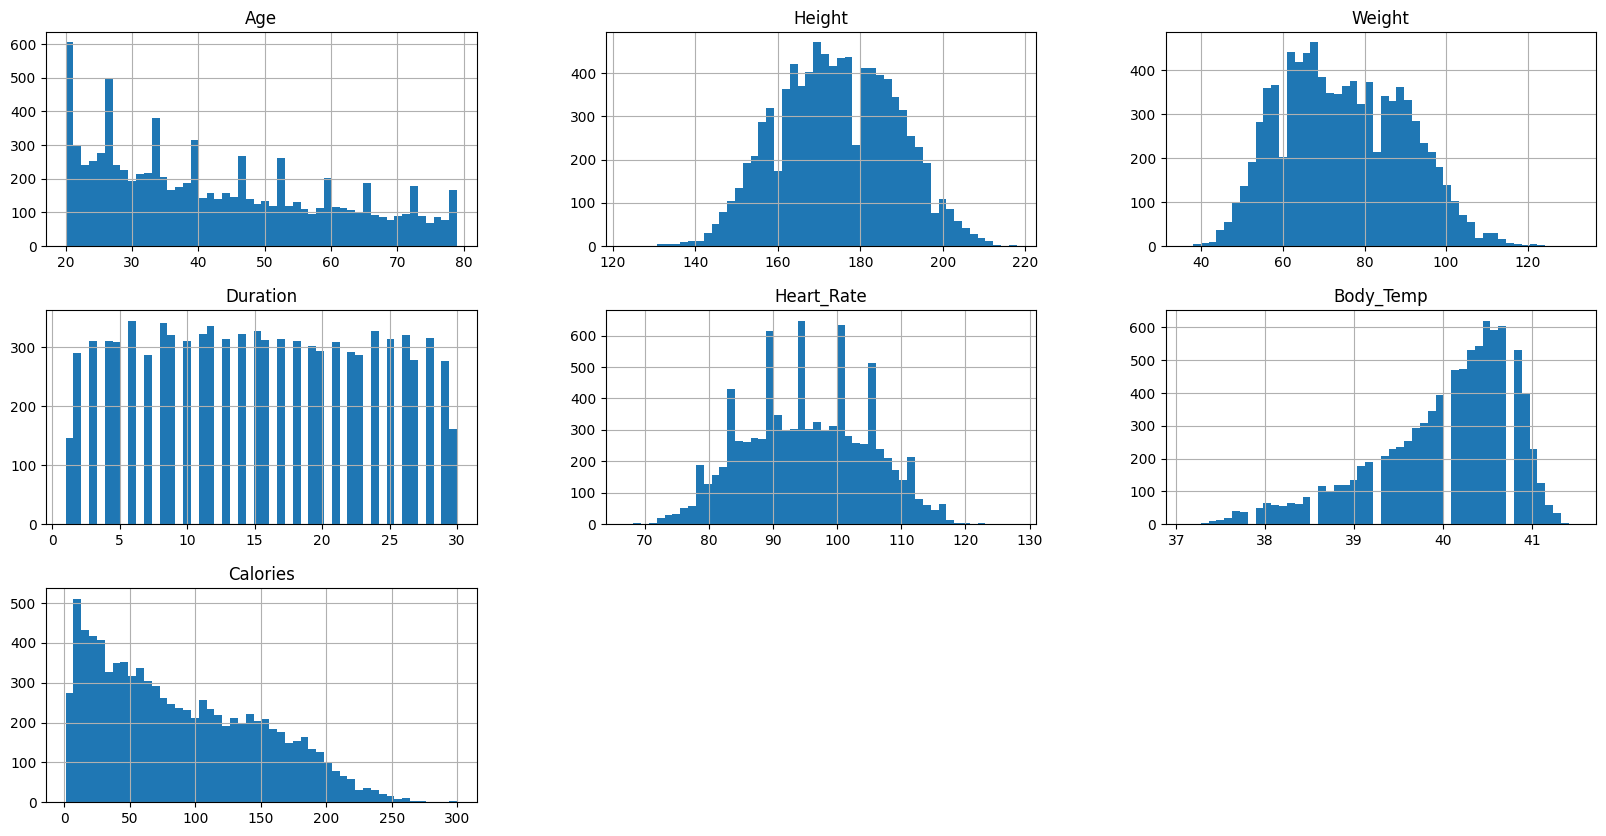

In [126]:
#histogram
calories_df.hist(figsize=(20,10), bins = 50)
plt.show()

In [127]:
#pie chart age
age_counts = calories_df['Age'].value_counts()
age_counts

Age
20    315
22    297
21    290
25    276
26    259
24    254
23    242
28    240
27    238
29    227
32    217
31    215
35    206
33    202
30    195
38    187
34    180
39    177
37    177
36    166
44    159
42    158
45    145
41    142
46    141
43    140
40    139
48    139
52    137
50    135
55    130
47    128
49    126
53    125
54    120
51    119
59    116
61    115
58    113
62    112
56    109
63    108
65    102
64    100
71     96
57     95
67     92
73     91
74     89
70     89
72     88
76     87
60     87
66     87
68     87
79     86
78     82
77     79
69     78
75     69
Name: count, dtype: int64

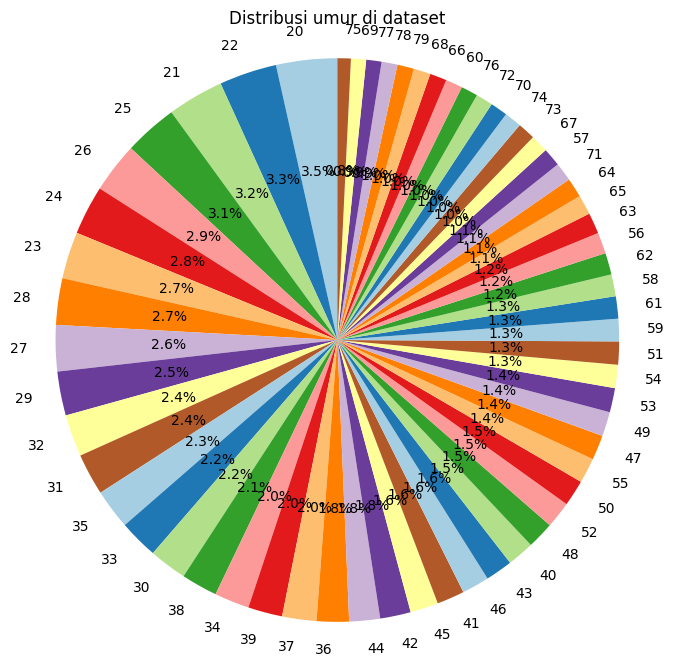

In [128]:
plt.figure(figsize=(8,8))
plt.pie(age_counts, labels=age_counts.index,
       autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Distribusi umur di dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

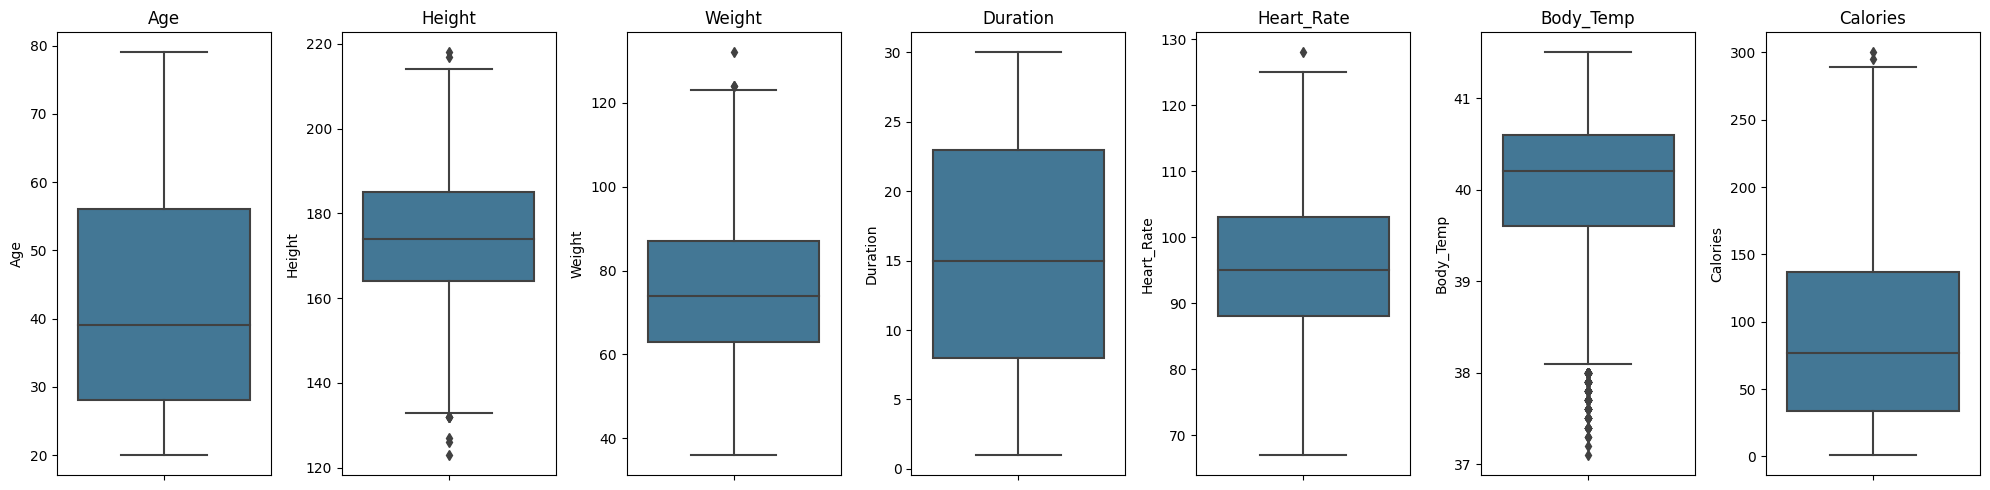

In [129]:
#finding outlier using BoxPlot
#removed 'Gender' bcs it's not numeric
boxplot_columns = [ 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories']
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
for i, column in enumerate(boxplot_columns):
    sns.boxplot(y=calories_df[column], ax=axes[i], palette='mako')
    axes[i].set_title(column)
plt.tight_layout()
plt.show

## outlier detected, time to transform the data

In [130]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
columns_to_scale = [ 'Height', 'Weight', 'Heart_Rate', 'Body_Temp', 'Calories']
Q1 = calories_df[columns_to_scale].quantile(0.25)
Q3 = calories_df[columns_to_scale].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
calories_df_cleaned = calories_df[~((calories_df[columns_to_scale] < lower_bound) | (calories_df[columns_to_scale] > upper_bound)).any(axis=1)]

# Display the cleaned DataFrame
calories_df_cleaned.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000
mean,42.667657,174.422400,74.936800,15.768114,95.746629,40.071840,90.676114
std,16.949858,14.152101,14.982674,8.098254,9.383568,0.703264,61.462412
min,20.000000,133.000000,38.000000,1.000000,69.000000,38.100000,2.000000
25%,28.000000,164.000000,63.000000,9.000000,89.000000,39.600000,38.000000
50%,39.000000,174.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,214.000000,123.000000,30.000000,125.000000,41.500000,280.000000


<function matplotlib.pyplot.show(close=None, block=None)>

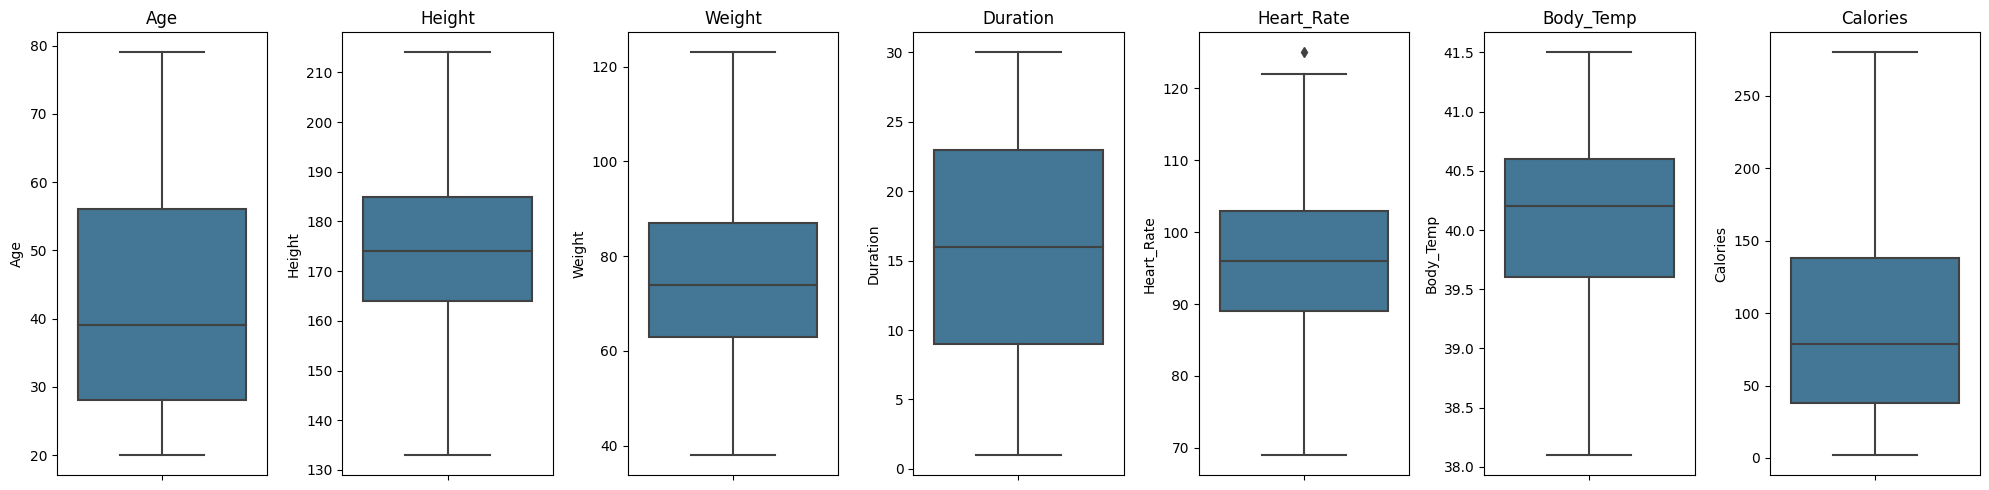

In [131]:
#finding outlier using BoxPlot
#removed 'Gender' bcs it's not numeric
boxplot_columns = [ 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories']
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
for i, column in enumerate(boxplot_columns):
    sns.boxplot(y=calories_df_cleaned[column], ax=axes[i], palette='mako')
    axes[i].set_title(column)
plt.tight_layout()
plt.show

## Label encoding is needed to transform gender into numerical

In [132]:
# Feature Engineering - One Hot encoding, Label Encoder (Opsional, dibutuhkan atau tidak?)
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()

calories_df_cleaned['Gender'] = label_encoder.fit_transform(calories_df_cleaned['Gender'])
calories_df_cleaned

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,46,187.0,82.0,24.0,98.0,40.7,127.0
1,1,21,181.0,85.0,4.0,77.0,39.0,5.0
2,1,53,194.0,97.0,19.0,105.0,40.3,139.0
3,1,61,199.0,114.0,2.0,83.0,38.2,9.0
4,0,31,170.0,67.0,29.0,111.0,41.1,192.0
...,...,...,...,...,...,...,...,...
8995,0,75,148.0,51.0,22.0,104.0,40.6,151.0
8996,0,21,172.0,67.0,20.0,104.0,40.7,114.0
8997,1,57,189.0,92.0,8.0,90.0,39.5,41.0
8998,1,35,174.0,76.0,12.0,97.0,40.2,57.0


# Modeling

In [133]:
# Features Selection - Memilih variabel features (x) & target (y)
calories_features =['Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp']
X=calories_df_cleaned[calories_features]
y=calories_df_cleaned['Calories']

In [134]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [135]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print('Linear Regression Train Score is : ', lr_model.score(X_train, y_train))
print('Linear Regression Test Score is : ', lr_model.score(X_test, y_test))


Linear Regression Train Score is :  0.9674656610843784
Linear Regression Test Score is :  0.9665846295259882


## Random Forest Reggresor

In [136]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=150).fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print('Random Forest Train Score is : ', rf_model.score(X_train, y_train))
print('Random Forest Test Score is : ', rf_model.score(X_test, y_test))


Random Forest Train Score is :  0.9995924008972384
Random Forest Test Score is :  0.9974475421518619


## Gradient Boosting

In [137]:
#XGBoost (Gradient Boosting)

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators = 150, learning_rate = 1.5, max_depth = 3)
gb_model = gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print('Gradient Boosting Train Score is : ', gb_model.score(X_train, y_train))
print('Gradient Boosting Test Score is : ', gb_model.score(X_test, y_test))


Gradient Boosting Train Score is :  0.9948717014048128
Gradient Boosting Test Score is :  0.9898903881010805


# Evaluation

In [138]:
#ini dari ppt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fungsi untuk menghitung dan menampilkan metrik
def print_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f" MAE: {mae:.3f}")
    print(f" MSE: {mse:.3f}")
    print(f" RMSE: {rmse:.3f}")
    print(f" R²: {r2:.3f}")

# Hitung metrik untuk setiap model
print_metrics(y_test, lr_pred, "Linear Regression")
print_metrics(y_test, rf_pred, "Random Forest")
print_metrics(y_test, gb_pred, "Gradient Boosting")


Metrics for Linear Regression:
 MAE: 8.428
 MSE: 125.345
 RMSE: 11.196
 R²: 0.967
Metrics for Random Forest:
 MAE: 2.050
 MSE: 9.575
 RMSE: 3.094
 R²: 0.997
Metrics for Gradient Boosting:
 MAE: 4.383
 MSE: 37.922
 RMSE: 6.158
 R²: 0.990


Insight setelah evaluasi: We will be using random forest regressor bcs it gave us the best result

# Model Prediction - Uji Testing (Opsional)

In [139]:
# Re-train model dengan keseluruhan data training
rf_model = RandomForestRegressor(n_estimators=150).fit(X, y)

In [140]:
# kalian bisa expot dataset buat diskor di kaggle disini pathnya(filenya aplod dulu di kaggle input)
df_buat_submisi = pd.read_csv('/kaggle/input/olc-calories/Test.csv')

In [141]:
# Feature Engineering - Label Encoder
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()

df_buat_submisi['Gender'] = label_encoder.fit_transform(df_buat_submisi['Gender'])

In [142]:
# drop column dulu biar klom lain yang masuk di prediksi
test = df_buat_submisi.drop(['User_ID'], axis=1)

#assign X_testfile
X_testing=df_buat_submisi[calories_features]

# bisa prediksi dataset kalian dengan panggil model kalian (kalau namanya rf_model pake ini sesuain aja) 
hasil_prediksi = rf_model.predict(X_testing)


# Output Prediction CSV


In [143]:
# buat ngisi dataframe baru dengan id test.csv
submission_df = pd.DataFrame()
submission_df['User_ID'] = df_buat_submisi['User_ID'].copy() 

# ngisi kolom baru sama hasil prediksi
submission_df['TARGET'] = hasil_prediksi 

# output ke csv tanpa kolom bawaaan
submission_df.to_csv('submission.csv', index=False)